**B**

In this section, you run the Wolff cluster algorithm, one of the great algorithms of statistical physics.

**B1**

- Download (cut-and-paste) the Wolff cluster Monte Carlo algorithm for  the Ising model shown below. Familiarize yourself with how it works  before going on. 

In [1]:
import random, math

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}

T = 2.0
p  = 1.0 - math.exp(-2.0 / T)
nsteps = 1000
S = [random.choice([1, -1]) for k in range(N)]
E = [energy(S, N, nbr)]
for step in range(nsteps):
    k = random.randint(0, N - 1)
    Pocket, Cluster = [k], [k]
    while Pocket != []:
        j = random.choice(Pocket)
        for l in nbr[j]:
            if S[l] == S[j] and l not in Cluster \
                   and random.uniform(0.0, 1.0) < p:
                Pocket.append(l)
                Cluster.append(l)
        Pocket.remove(j)
    for j in Cluster:
        S[j] *= -1
    E.append(energy(S, N, nbr))
print('mean energy per spin:', sum(E) / float(len(E) * N))

mean energy per spin: -1.7361527361527362


**Question: Explain in a few words** what the **Pocket** stands for. 


**Answer**: The **Pocket** stands for list of pocket sites that contains the new members of cluster sites and that allows cluster to grow. 

- Then, **modify the program** such that instead of picking a random element j from the pocket, it picks always the last element (use **j=Pocket.pop()**, and remove the Pocket.remove(j) line). Check that this modified version yields the **same results**, and **explain** the reason.

In [10]:
import random, math

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}

T = 2.0
p  = 1.0 - math.exp(-2.0 / T)
nsteps = 100000
S = [random.choice([1, -1]) for k in range(N)] #sigma
E = [energy(S, N, nbr)]
for step in range(nsteps):
    k = random.randint(0, N - 1)
    Pocket, Cluster = [k], [k]
    while Pocket != []:
        j = random.choice(Pocket)
        for l in nbr[j]:
            if S[l] == S[j] and l not in Cluster \
                   and random.uniform(0.0, 1.0) < p:
                Pocket.append(l)
                Cluster.append(l)
        j=Pocket.pop()
    for j in Cluster:
        S[j] *= -1
    E.append(energy(S, N, nbr))
print('mean energy per spin:', sum(E) / float(len(E) * N))

mean energy per spin: -0.45281213854528124


- The two codes does not yield the same result.

**B1 (continued)**

- Greatly increase the number of iterations of the algorithm.  Run it for **L=6 and T = 2.0**. Check that you recover the exact value for the mean energy E/N= -1.7473.. (known from exact enumeration). **Communicate the results obtained** in four independent runs of the algorithms. Do not forget to **indicate your value of nsteps**.

In [11]:
import random, math

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}

T = 2.0
p  = 1.0 - math.exp(-2.0 / T)
nsteps = 100000
S = [random.choice([1, -1]) for k in range(N)]
E = [energy(S, N, nbr)]
for step in range(nsteps):
    k = random.randint(0, N - 1)
    Pocket, Cluster = [k], [k]
    while Pocket != []:
        j = random.choice(Pocket)
        for l in nbr[j]:
            if S[l] == S[j] and l not in Cluster \
                   and random.uniform(0.0, 1.0) < p:
                Pocket.append(l)
                Cluster.append(l)
        Pocket.remove(j)
    for j in Cluster:
        S[j] *= -1
    E.append(energy(S, N, nbr))
print('mean energy per spin:', sum(E) / float(len(E) * N))

mean energy per spin: -1.7445381101744537


- At nsteps = 100000, we gets the exact value

**B2**

As discussed in lecture 8, the **Ising model was solved exactly by Onsager**, in 1944, for the infinite lattice. The exact solution for the finite lattice was obtained by **Kaufman in 1949**. Based on her magnificent paper, **Ferdinand and Fisher, in 1969**,  computed the specific heat for finite lattices with periodic boundary  conditions, exactly the system that we consider, and the result is shown  here:

- Incorporate into the cluster algorithm (from Section B1) the read-in/write-out part of section A2,  which allows you to do a 'warm start' (that is, discard some initial  data). Run this modified cluster algorithm at T=2.27, for lattices of  size L=2, 4, 8, 16, 32 and check Ferdinand and Fisher's  analytical  results. To do so, implement a few lines analogous to:

In [188]:
import random, math

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

list_L = [2, 4, 8, 16, 32]
 #
for L in list_L:
    N = L * L
    nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N)
                                    for i in range(N)}
    T = 2.27
    p  = 1.0 - math.exp(-2.0 / T)
    nsteps = 1000
    S = [random.choice([1, -1]) for k in range(N)]
    E = [energy(S, N, nbr)]
    
    for step in range(nsteps):
        k = random.randint(0, N - 1)
        Pocket, Cluster = [k], [k]
        while Pocket != []:
            j = random.choice(Pocket)
            for l in nbr[j]:
                if S[l] == S[j] and l not in Cluster \
                      and random.uniform(0.0, 1.0) < p:
                    Pocket.append(l)
                    Cluster.append(l)
            Pocket.remove(j)
        for j in Cluster:
            S[j] *= -1
        E.append(energy(S, N, nbr))
    E_mean = sum(E) / len(E)
    E2_mean = sum(a ** 2 for a in E) / len(E)
    cv = (E2_mean - E_mean ** 2 ) / N / T ** 2
    print('L =', L,';', 'Mean energy = ', E_mean, '&', 'Specific heat =', cv)

L = 2 ; Mean energy =  -6.761238761238761 & Specific heat = 0.40635178750958834
L = 4 ; Mean energy =  -25.23076923076923 & Specific heat = 0.7497462403363049
L = 8 ; Mean energy =  -94.80119880119881 & Specific heat = 1.2620115775707634
L = 16 ; Mean energy =  -360.57142857142856 & Specific heat = 2.7242907327076367
L = 32 ; Mean energy =  -1398.973026973027 & Specific heat = 13.991201920468821


**(Remember the definition** of the specific heat from lecture 8).

- **Communicate your results** (without error bars, just quote the results of one or two runs, after a warm start, for each value of the parameters) at the critical temperature T = 2.27. 

L = 2 ; Mean energy =  -6.761238761238761 & Specific heat = 0.40635178750958834 <br>
L = 4 ; Mean energy =  -25.23076923076923 & Specific heat = 0.7497462403363049 <br>
L = 8 ; Mean energy =  -94.80119880119881 & Specific heat = 1.2620115775707634 <br>
L = 16 ; Mean energy =  -360.57142857142856 & Specific heat = 2.7242907327076367 <br>
L = 32 ; Mean energy =  -1398.973026973027 & Specific heat = 13.991201920468821 <br>

- **Can you confirm that**, as indicated in the conclusion of lecture 8, observables as the specific heat for the Ising model in the transition region strongly depend on lattice size? 

The magnitude of specific heat does depend on the lattice size, it increases with lattice size, as Cv  $\propto$ N (number of lattice sites).



Text(0, 0.5, 'Cv')

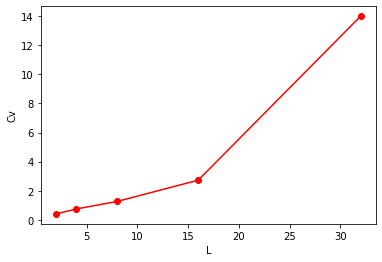

In [195]:
import matplotlib.pyplot as plt
L = [2, 4, 8, 16, 32]
Cv = [0.406, 0.749, 1.262, 2.724, 13.991]
plt.plot(L, Cv, '-o', color='red')
plt.xlabel('L')
plt.ylabel('Cv')